# Data Science Term Project

## Assessing Predictive Capabilities of Various Variables in Predicting Game Newspaper Subscription

- Name: Geoff Acabado
- Student number: 59285189
- DSCI 100 003

## I. Introduction
Video games have become a widespread form of entertainment, attracting millions of players across diverse demographics (Atske & Atske, 2024). Minecraft stands out as one of the most popular sandbox games, offering an open-ended world where players can build, explore, and interact (Cipollone, Schifter, & Moffat, 2014). In addition to being a popular game, Minecraft provides a rich source of behavioral data that can be leveraged for research in areas such as player engagement, user behavior analysis, and targeted marketing. 

In this project, we analyze gameplay data collected from a Minecraft research server hosted by a research group at the University of British Columbia (UBC). The group collected detailed logs of player behavior as participants interact with the game world. This data includes various features such as age, playtime, etc., and whether or not a player has subscribed to a newsletter related to the game. 

By applying data science techniques to this data, we aim to explore whether certain player characteristics can be used to predict whether a player subscribes to the game-related newsletter. The insights from this analysis can assist the research team in better understanding the factors that drive player engagement and inform future recruitment and resource allocation strategies. **Table 1.1** shows each of the variables in the player.csv dataset and what do they mean. 

| Variable     | Type          | Description                                                                 |
|--------------|---------------|-----------------------------------------------------------------------------|
| Experience   | factor         | Experience level of player: beginner, amateur, regular, pro, veteran        |
| subscribe    | logical        | Whether the player is subscribed (TRUE/FALSE)                               |
| hashedEmail  | character      | Hashed email of player to protect privacy                                   |
| played_hours | double         | Number of hours played by players                                           |
| name         | character      | Name of the player                                                          |
| gender       | factor         | Gender identity: agender, male, female, non-binary, two-spirited, prefer not to say |
| Age          | double         | Age of the player in years                                                  |

**Table 1.1**

The table below shows a complete list of all the variables in the `player.csv` dataset used in this project.

An additional dataset contains session-level start and end time but is not utilized in this analysis as the player experience provides sufficient information for addressing the research question. **Code 0.1** contains the libraries that will be used in this project and **Code 0.2** loads the data that will be analyzed. 

In [118]:
#code 0.1
#Some libraries to install
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

# We need to set this seed so that all results in this notebook can be replicated
set.seed(123)

In [119]:
#Code 0.2
# install the data needed
player_data = read_csv("players.csv")
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


### Data explorations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


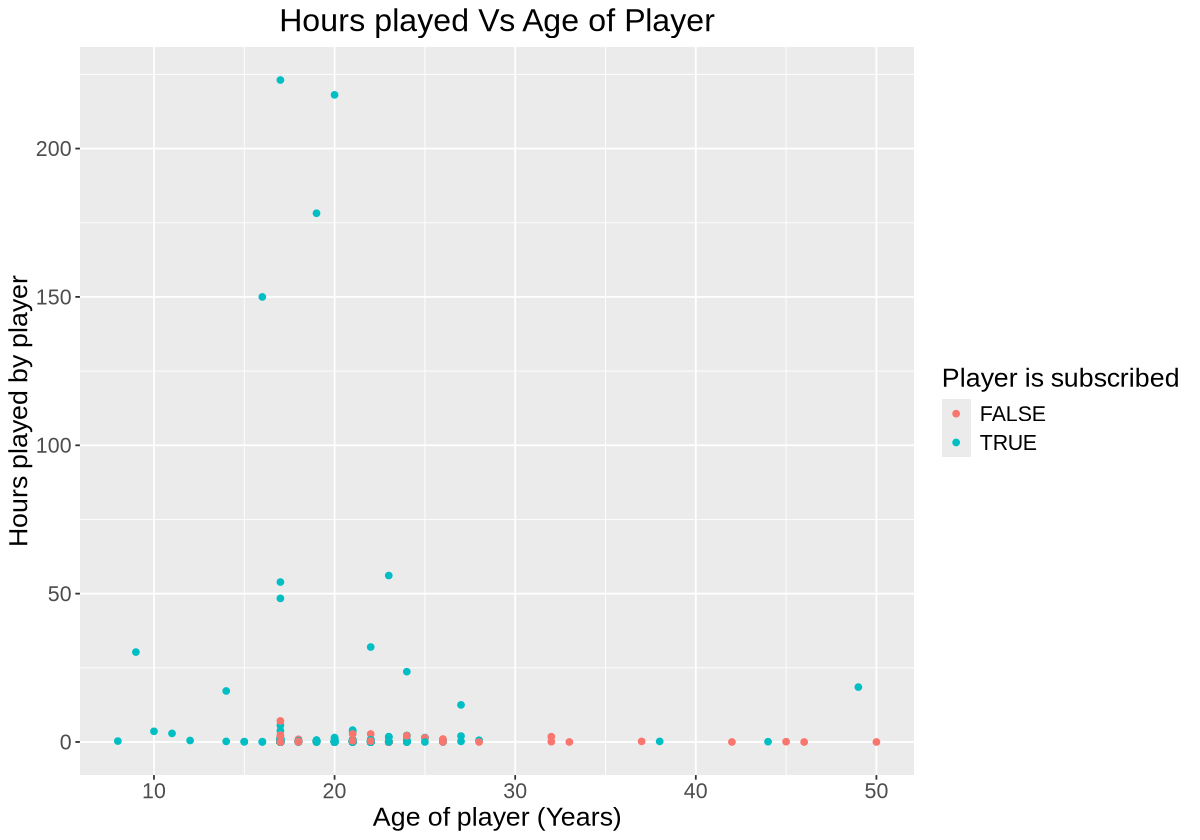

In [120]:
#Code 1.1
#Lets explore relationships between hours played, age and whether they are subscibed to game newspaper
options(repr.plot.height = 7, repr.plot.width = 10)
player_plot = player_data |>
    ggplot(aes(y = played_hours	, x = Age, color = subscribe)) +
    geom_point() +
    labs(
        title = "Hours played Vs Age of Player",
        y = "Hours played by player",
        x = "Age of player (Years)",
        colour = "Player is subscribed" ) +
    theme(text = element_text(size = 16), plot.title = element_text(hjust = 0.5))
player_plot

**Figure 1.1**

The plot above shows the relationship between the age of the player on the x-axis and the number of hours they have played Minecraft on the y-axis. Game-related newspaper subscriptions of each player are represented by the color of the points. Two datapoints are removed because the age of the player is unknown. 

The code above gave us a warning message indicating that there are 2 datapoints that have missing values or are out of range. In **code 1.15**, we show that these observations have unknown age and so were excluded from the ploting. One can see from **Figure 1.1** that most of the datapoints consist of players playing little to 0 hours in the game, making it difficult to make any inferences from the data. For this reason, the data was plotted on a logarithmic scale in **Figure 1.2** to magnify the subtleties in low values of hours played. 

In [121]:
#Code 1.15
missing_values = player_data |>
    filter(is.na(Age))
missing_values

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Regular,TRUE,7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d,0.1,Devin,Two-Spirited,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


**Figure 1.2**

The scatter plot above shows the age of each player in the x-axis and the hours played on the y-axis but logarithmically scaled to show subtilities across different ranges. 

There was a warning that the logarithmic transformation turned the some 0s to infinity but it looks like it did not affect the purpose of our visualization that much. All of the supposedly 'negatively infinite' values remained at the bottom of the graph. From Figure 1.2, it can be easily observed that there is no obvious pattern between hours played by the player and their age. Both variables also do not seem to be correlated with whether the players are subscribed or not. However, it is important to notice that everyone who played for 10 hours or more is subscribed to a game newspaper. Another observation we see is that most players are around 15 to 25 years old, indicating that Minecraft is popular among this demographic

### II. Methods

The objective of this analysis is to find out which variables in the dataset are most predictive of the player's subscription to a game-related newspaper. We will start off by wrangling the data and giving the variables more appropriate labels. 

In [122]:
set.seed(123)
#code 2.1
player_data_clean = player_data |>
    select(experience, subscribe, played_hours, gender, Age) |>
    mutate(subscribe = as.factor(subscribe)) |>
    mutate(experience = as.factor(experience)) |>
    mutate(gender = as.factor(gender)) 

The data was first loaded and cleaned to retain only the relevant variables necessary for analysis. As shown in **Code 2.1**, we selected experience, subscribe, played_hours, gender, and Age from the original dataset. Since the classification model requires a categorical response variable, the subscribe column was converted into a factor. This ensured that the subsequent modeling functions would treat it appropriately as a classification target rather than a continuous variable. 

In [123]:
#Code 2.2
#split the data
player_data_split = initial_split(player_data_clean, prop = 0.7, strata = subscribe)
player_data_training = training(player_data_split)
player_data_testing = testing(player_data_split)

In [124]:
#Code 2.3
# Tuning the model with 5 fold cross validation
player_data_vfold = vfold_cv(player_data_training, v = 5, strata = subscribe)

In [125]:
#Code 2.4
#make recipe
player_data_recipe = recipe(subscribe ~., data = player_data_training) |>
    step_dummy(all_nominal_predictors()) |>  # convert categorical vars
    step_normalize(all_numeric_predictors()) # normalize for KNN

In [126]:
#Code 2.5
#Tune model
knn_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [127]:
#Code 2.6
# Start with all predictor names
names <- c("experience", "played_hours", "gender", "Age")

# Initialize storage
accuracies <- tibble(
  size = integer(),
  model_string = character(),
  accuracy = numeric(),
  best_k = integer()
)

selected <- c()  # predictors we've selected
n_total <- length(names)

# Begin forward selection loop
for (i in 1:n_total) {
  accs <- list()
  models <- list()
  best_ks <- list()

  for (j in 1:length(names)) {
    preds_new <- c(selected, names[[j]])
    model_string <- paste("subscribe ~", paste(preds_new, collapse = "+"))

    # Build recipe
    dynamic_recipe <- recipe(as.formula(model_string), data = player_data_training) |>
      step_dummy(all_nominal_predictors()) |>
      step_normalize(all_numeric_predictors())

    # Tune model and get accuracy + best k
    tuned <- workflow() |>
      add_recipe(dynamic_recipe) |>
      add_model(knn_spec) |>
      tune_grid(resamples = player_data_vfold, grid = 10)

    best_result <- tuned |>
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      arrange(desc(mean)) |>
      slice(1)

    accs[[j]] <- best_result$mean
    models[[j]] <- model_string
    best_ks[[j]] <- best_result$neighbors
  }

  jstar <- which.max(unlist(accs))
  accuracies <- accuracies |>
    add_row(
      size = i,
      model_string = models[[jstar]],
      accuracy = accs[[jstar]],
      best_k = best_ks[[jstar]]
    )

  # Update selected predictors
  selected <- c(selected, names[[jstar]])
  names <- names[-jstar]
}

# View results
accuracies


→ A | warning: !  The following column has zero variance so scaling cannot be used:
                 gender_Other.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
                 before normalizing.

There were issues with some computations   A: x1

There were issues with some computations   A: x1



→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 27 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 27 to size 26.

There were issues with some computations   A: x1

There were issues with some computations   A: x1



→ A | warning: !  The following column has zero variance so scaling cannot be used:
                 gender_Other.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
    

size,model_string,accuracy,best_k
<int>,<chr>,<dbl>,<int>
1,subscribe ~ played_hours,0.5288360,13
2,subscribe ~ played_hours+Age,0.7526455,9
3,subscribe ~ played_hours+Age+gender,0.7523148,9
4,subscribe ~ played_hours+Age+gender+experience,0.7433862,10


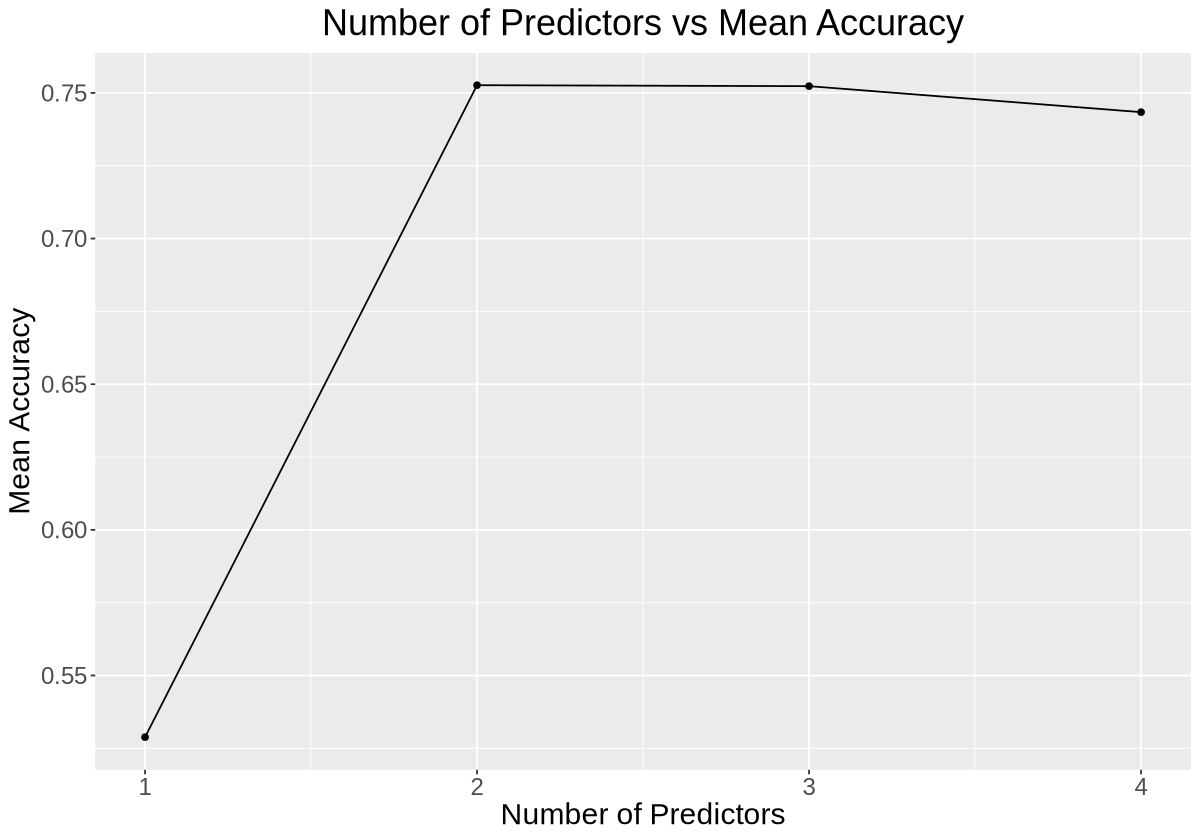

In [128]:
#Code 2.7
options(repr.plot.height = 7, repr.plot.width = 10)
knn_results_plot = accuracies |>
    ggplot(aes(x = size, y = accuracy)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Predictors" , 
         y = "Mean Accuracy", 
         title = "Number of Predictors vs Mean Accuracy")+
    theme(text = element_text(size = 18), plot.title = element_text(hjust = 0.5))
knn_results_plot

**Figure 2.1**

The graph above shows the mean accuracy of the model for each number of predictors used. 

The results of the tuning procedure are visualized in **Figure 2.1** where one can see that the accuracy of the model peaks when the hours played and experience of the player are used as predictors. This is then followed by a slow decline in accuracy indicating that age and gender are not necessarily good predictors of subscription of the players.

### III. Results

In [138]:
#Code 3.1
# Create final model
final_spec = nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
  set_engine("kknn") |>
  set_mode("classification")

player_data_recipe_best = recipe(subscribe ~ played_hours + experience, data = player_data_training) |>
    step_dummy(all_nominal_predictors()) |>  # convert categorical vars
    step_normalize(all_numeric_predictors()) # normalize for KNN

final_fit <- workflow() |>
    add_recipe(player_data_recipe_best) |>
    add_model(final_spec) |>
    fit(data = player_data_training)

Using the results from the cross-validation tuning, we identified that a k value of 9 yielded the highest classification accuracy. We then built the final k-nearest neighbors classification model using this optimal value **(Code 3.1)**. The model was trained on the full training dataset, incorporating the same preprocessing steps of centering and scaling the predictor variables.

In [139]:
#Code 3.2
#Evaluate final model
test_predictions <- predict(final_fit, player_data_testing) |>
  bind_cols(player_data_testing)

In [140]:
#Code 3.3
#print the different metrics to asses the overall quality of the model
eval_metrics <- bind_rows(
  accuracy(test_predictions, truth = subscribe, estimate = .pred_class),
  precision(test_predictions, truth = subscribe, estimate = .pred_class, event_level = "second"),
  recall(test_predictions, truth = subscribe, estimate = .pred_class, event_level = "second")
)
eval_metrics




.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7666667
precision,binary,0.7777778
recall,binary,0.9545455


| Metric    | Estimate |
|-----------|----------|
| accuracy  | 0.77     |
| precision | 0.78     |
| recall    | 0.95    |

**Table 2.1**

The table above shows a summary of the metrics used to assess the overall quality of the model. It contains calculated accuracy, precision, and recall of the model when applied to the testing dataset. 

### IV. Discussion
In this study, we developed a classification model to predict whether a player is subscribed to a gaming newspaper based on their experience and hours played. After tuning the k-nearest neighbors (k-NN) algorithm using five-fold cross-validation, we identified that a k value of 7 provided the highest classification accuracy. When evaluated on the testing set, the final model achieved an accuracy of approximately 76.7%, with a precision of 77.8% and a recall of 95.5%. 



### V. References
[ 1] Atske, S., & Atske, S. (2024, May 9). Teens and video games today. Pew Research Center. https://www.pewresearch.org/internet/2024/05/09/teens-and-video-games-today/#:~:text=Playing%20video%20games%20is%20widespread,23%2C%202023. 


[2] Cipollone, Maria & Schifter, Catherine & Moffat, Rick. (2014). Minecraft as a Creative Tool: A Case Study. International Journal of Game-Based Learning. 4. 1-14. 10.4018/ijgbl.2014040101. 